In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Historical Product Demand.csv')

In [3]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
data.shape

(1048575, 5)

In [5]:
data.Date = pd.to_datetime(data.Date)
data.Date.min(), data.Date.max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [6]:
data.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,1000
freq,16936,764447,481099,2075,112682
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN


In [7]:
data.Order_Demand = data.Order_Demand.str.replace('(', '')
data.Order_Demand = data.Order_Demand.str.replace(')', '')

In [8]:
data.Order_Demand = data.Order_Demand.astype(float)

In [9]:
data.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [10]:
data[['Product_Code', 'Warehouse', 'Product_Category']].describe()

,Product_Code,Warehouse,Product_Category
count,1048575,1048575,1048575
unique,2160,4,33
top,Product_1359,Whse_J,Category_019
freq,16936,764447,481099


In [11]:
data.isna().sum()/data.shape[0]

Product_Code        0.000000
Warehouse           0.000000
Product_Category    0.000000
Date                0.010718
Order_Demand        0.000000
dtype: float64

In [12]:
data = data[data['Date'].notnull()]
data.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [13]:
data.groupby('Product_Category')['Order_Demand'].agg('sum').reset_index().sort_values(by = 'Order_Demand', ascending = False).head()

,Product_Category,Order_Demand
18,Category_019,4.240159e+09
5,Category_006,4.055713e+08
4,Category_005,1.996745e+08
6,Category_007,1.286915e+08
27,Category_028,4.905535e+07


<AxesSubplot:xlabel='Product_Category'>

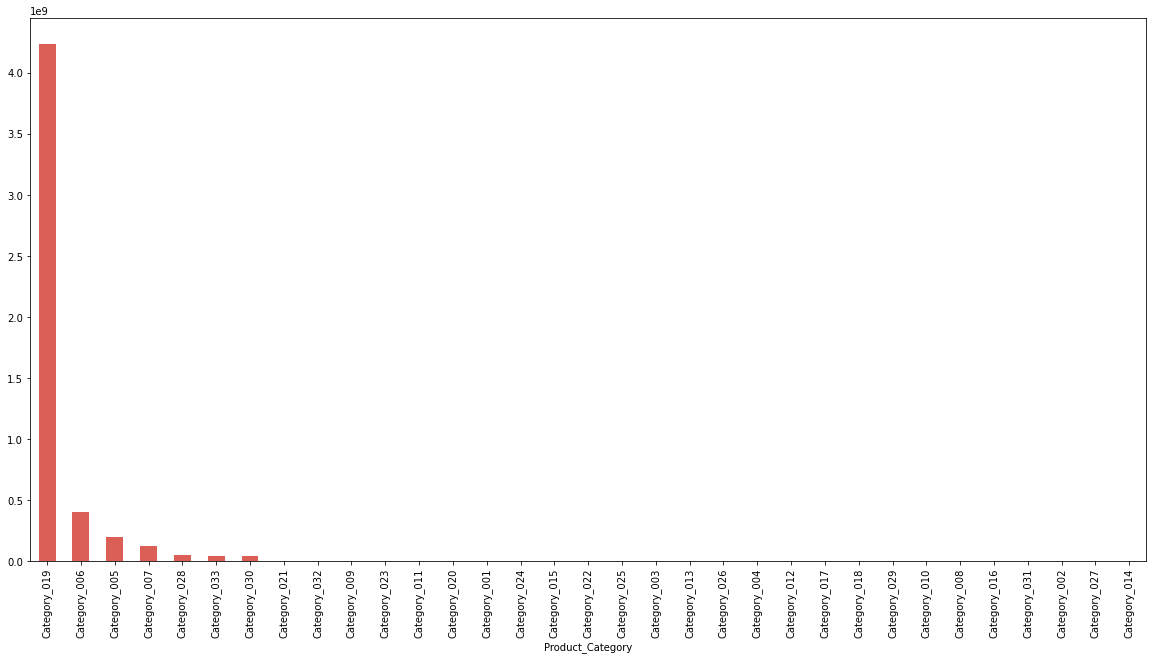

In [14]:
sns.set_palette(sns.color_palette('hls', 8))
plt.figure(figsize = (20, 10))
data.groupby('Product_Category')['Order_Demand'].agg('sum').sort_values(ascending = False).plot(kind = 'bar')

005, 006, 007 and 019 are major product categories

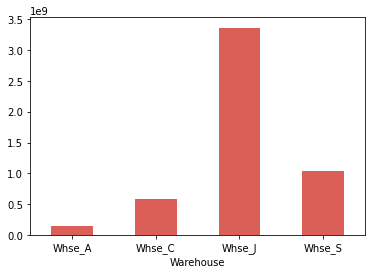

In [15]:
data.groupby('Warehouse')['Order_Demand'].agg('sum').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Seasonality in the data

In [16]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

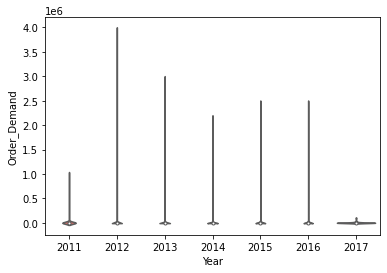

In [18]:
sns.violinplot(x = "Year", y = 'Order_Demand', data = data)
plt.show()

<AxesSubplot:xlabel='Year,Month'>

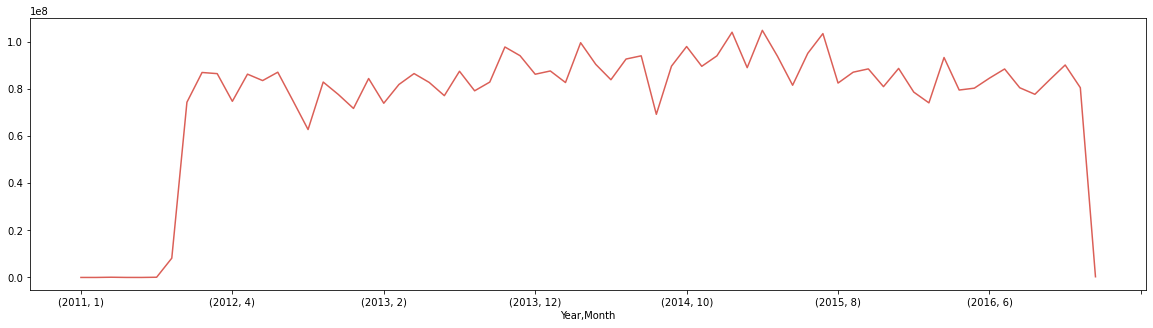

In [19]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby(['Year','Month'])['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year'>

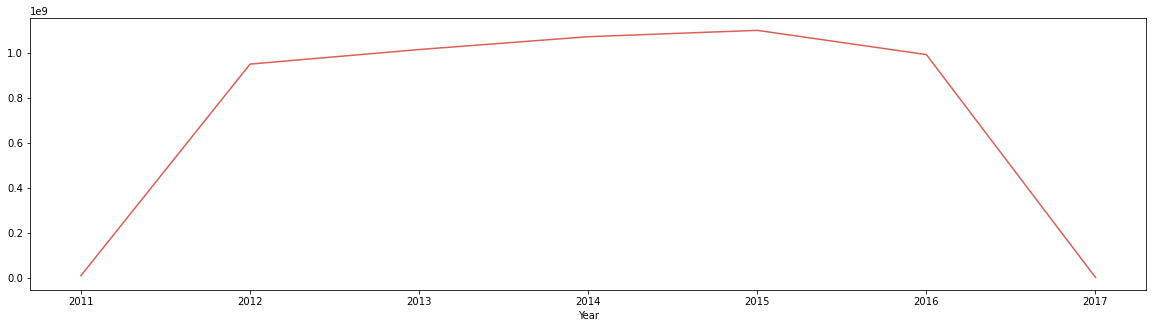

In [20]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby('Year')['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

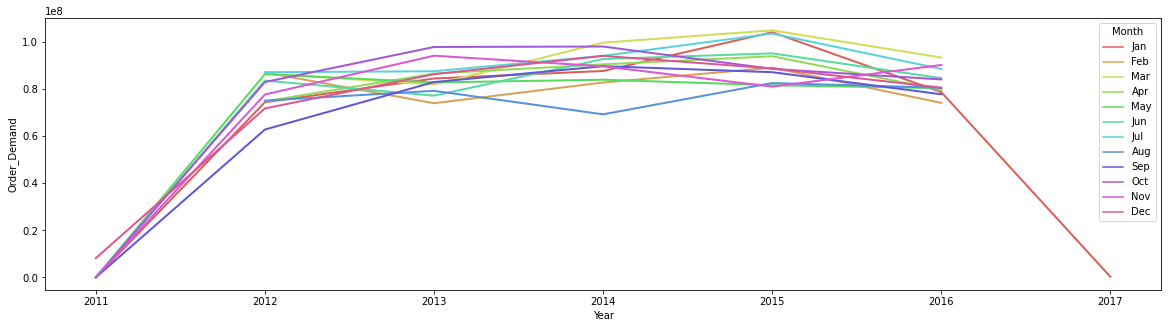

In [21]:
plt.figure(figsize = (20, 5))
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year', 'Month'], ascending = False)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 12))
sns.lineplot(data=temp, x="Year", y="Order_Demand", hue="Month", markers = True, lw = 2, hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


<AxesSubplot:xlabel='Month', ylabel='Order_Demand'>

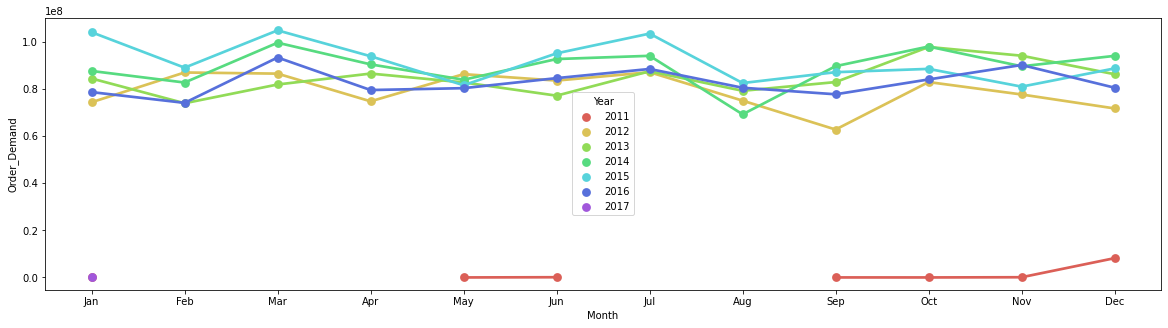

In [22]:
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Month'], ascending = True)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Month", y="Order_Demand", hue="Year")

In [23]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

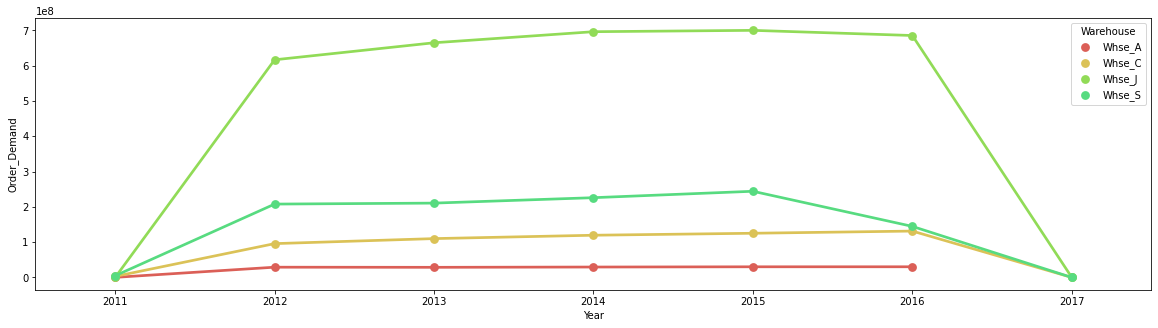

In [24]:
temp = data.groupby(['Year', 'Warehouse'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year'], ascending = True)
#temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Year", y="Order_Demand", hue="Warehouse")

In [25]:
#Excluding all data from 2017 and 2011 to ensure only years with complete data are reflected

data = data[data['Year'] != 2017]
data = data[data['Year'] != 2011]

In [26]:
data['Year'].value_counts()

2013    218298
2014    216404
2015    209661
2012    203635
2016    188645
Name: Year, dtype: int64

<AxesSubplot:xlabel='Month'>

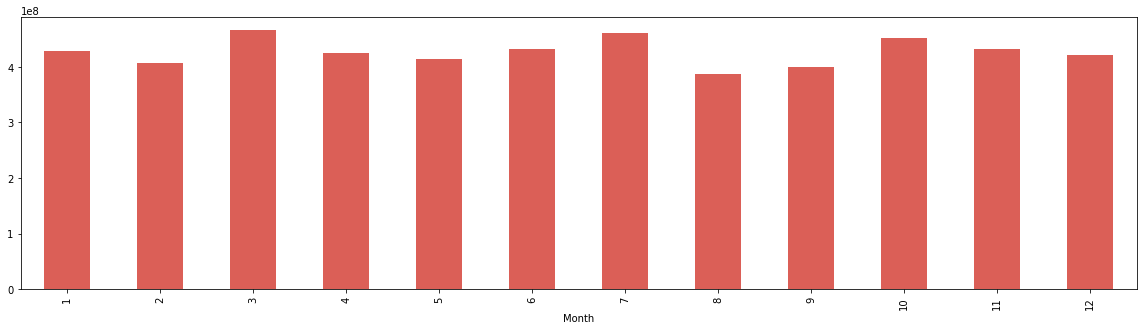

In [27]:
plt.figure(figsize = (20, 5))
data.groupby('Month')['Order_Demand'].agg('sum').plot(kind = 'bar')

In [28]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Warehouse', ylabel='Order_Demand'>

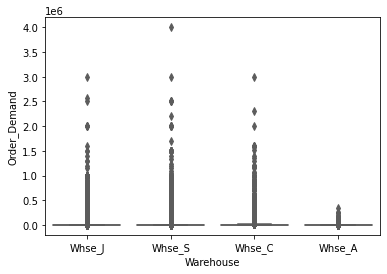

In [29]:
sns.boxplot(data = data, x = 'Warehouse', y  = 'Order_Demand')

<AxesSubplot:xlabel='Warehouse', ylabel='Log_Order_Demand'>

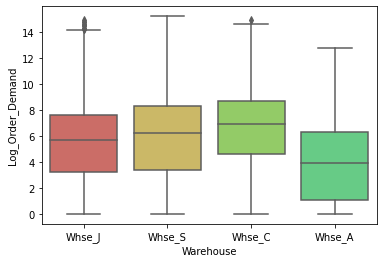

In [30]:
#Log transform of the order demand
temp = data.copy()
temp['Log_Order_Demand'] = np.log(temp['Order_Demand'])
sns.boxplot(data = temp, x = 'Warehouse', y  = 'Log_Order_Demand')

In [31]:
from statsmodels.tsa.seasonal import DecomposeResult

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

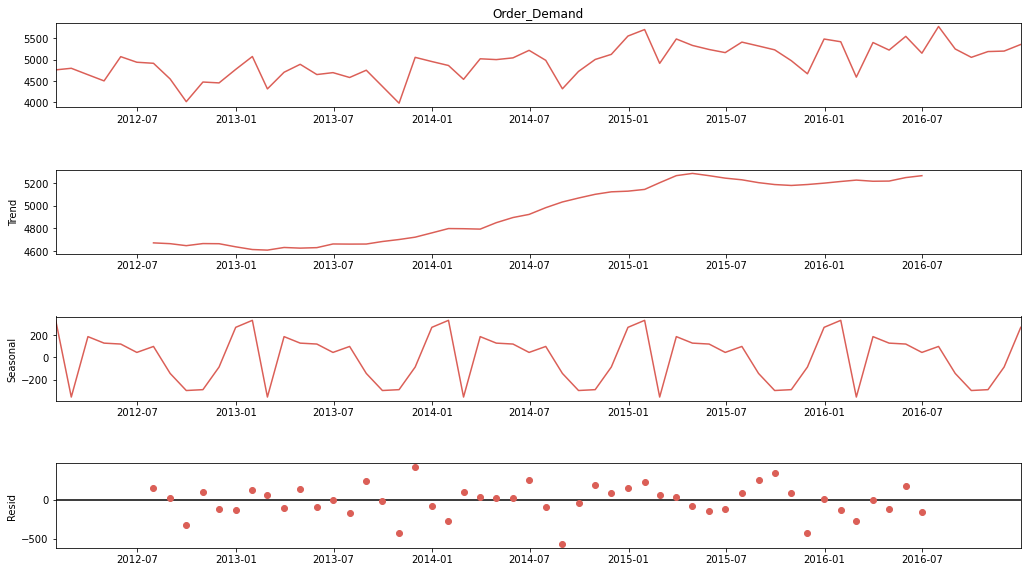

In [33]:
temp = None

month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None
decompose = seasonal_decompose(month_avg_sales, model = 'additive')
fig = decompose.plot()
fig.set_size_inches((16, 9))
#plt.show()

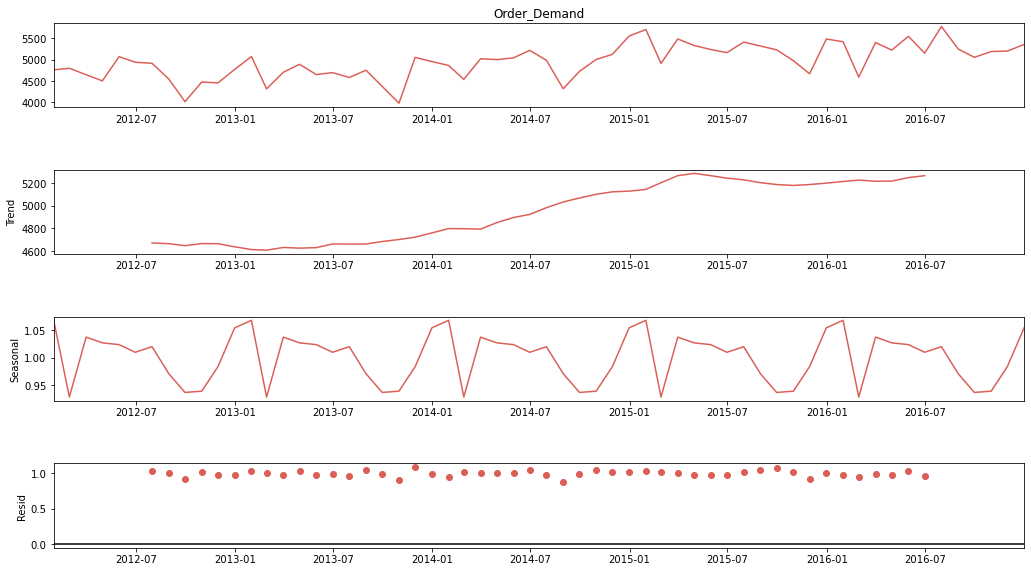

In [34]:
month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None
decompose = seasonal_decompose(month_avg_sales, model = 'multiplicative')
fig = decompose.plot()
fig.set_size_inches((16, 9))

In [35]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

In [36]:
data[['Product_Category', 'Warehouse', 'Order_Demand']].groupby(['Product_Category', 'Warehouse']).sum().reset_index().sort_values(by = ['Order_Demand']).pivot(index = 'Product_Category', columns = 'Warehouse', values = 'Order_Demand')

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
Product_Category,,,,
Category_001,1749.0,59909.0,1.622259e+06,72530.0
Category_002,NaN,NaN,NaN,628.0
Category_003,131499.0,NaN,3.926700e+04,220476.0
Category_004,NaN,NaN,NaN,96266.0
Category_005,1124300.0,12512000.0,1.289089e+08,56444950.0
Category_006,11591923.0,33051500.0,3.185602e+08,41807193.0
Category_007,2837624.0,7162843.0,1.121454e+08,6514672.0
Category_008,1903.0,317.0,1.534800e+04,NaN
Category_009,919881.0,250931.0,4.464670e+05,2163285.0


### Forecasting with the data

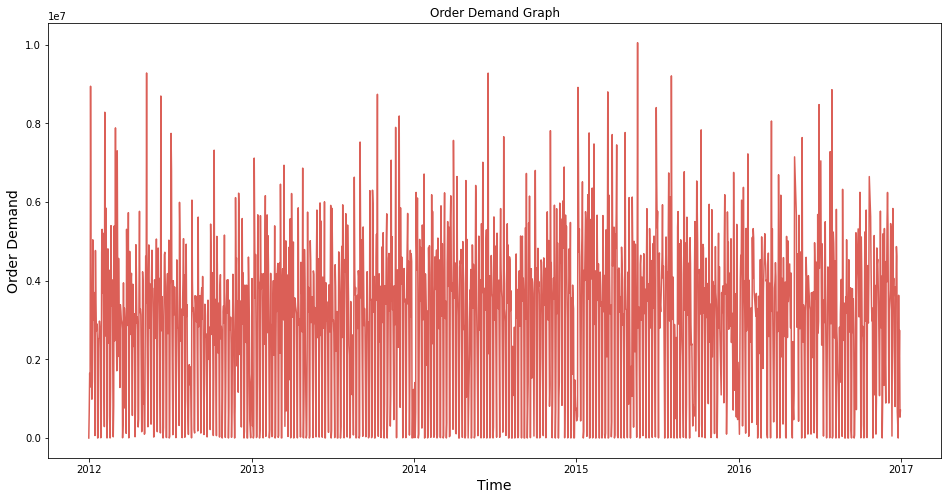

In [37]:
df = data.groupby('Date')['Order_Demand'].sum().reset_index()

plt.figure(figsize = (16, 8))
plt.title("Order Demand Graph")
plt.plot(df['Date'], df['Order_Demand'])
plt.xlabel('Time', fontsize = 14,)
plt.ylabel('Order Demand', fontsize = 14,)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math

In [46]:
order_D = df.filter(['Order_Demand']).values
train_close_len = math.ceil(len(order_D) * 0.8)
train_close_len

1345

In [47]:
scaler = MinMaxScaler()
scaled_order = scaler.fit_transform(order_D)
scaled_order

array([[1.99031453e-07],
       [6.76982600e-02],
       [1.63728946e-01],
       ...,
       [2.72703145e-01],
       [5.27917993e-02],
       [6.99545800e-02]])

In [61]:
train_len = 60

In [56]:
scaled_order.shape
train_order = scaled_order[0 : train_close_len, :]

X_train = []
y_train = []

for i in range(train_len, len(train_order)):
    X_train.append(train_order[i - train_len : i, 0])
    y_train.append(train_order[i, 0])
    
    if i <= train_len:
        print(X_train)
        print(y_train)

[array([1.99031453e-07, 6.76982600e-02, 1.63728946e-01, 1.28958549e-01,
       8.89847137e-01, 4.36947184e-01, 9.82368500e-02, 1.43570443e-01,
       5.01388891e-01, 3.30568853e-01, 2.98325061e-01, 3.68113549e-01,
       6.39388544e-03, 4.74326585e-01, 3.44696702e-01, 2.69870529e-01,
       2.89035666e-01, 2.55127374e-01, 1.99031453e-05, 1.34953277e-03,
       2.51593073e-01, 2.53474816e-01, 2.95791390e-01, 2.81800375e-01,
       2.26411613e-01, 6.16997505e-04, 2.32949398e-02, 4.68048834e-01,
       5.27871021e-01, 3.66383269e-01, 5.18157490e-01, 3.13818067e-01,
       2.88706070e-02, 8.24073013e-01, 4.73426465e-01, 2.58256546e-01,
       5.81354156e-01, 3.14602052e-01, 9.95157266e-05, 5.74927232e-02,
       4.78518585e-01, 2.40411486e-01, 3.48965828e-01, 4.24549316e-01,
       2.88825090e-01, 1.69176735e-04, 1.26577138e-01, 5.37255155e-01,
       3.60979068e-01, 3.33127004e-01, 3.99856478e-01, 1.72541561e-01,
       2.98547180e-03, 8.14840741e-02, 5.36301397e-01, 2.45390755e-01,
     

In [58]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [60]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1285, 60, 1)

In [65]:
test_order = scaled_order[train_close_len - train_len : , :]
X_test = []
y_test = []

for i in range(60, len(test_order)):
    X_test.append(test_order[i - 60 : i, 0])
    y_test.append(test_order[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [66]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [67]:
X_test.shape

(336, 60, 1)

### LSTM Model

In [74]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [75]:
model = Sequential()

model.add(LSTM(units = 512, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 256, activation = 'relu', return_sequences = False))
model.add(Dense(units = 1))

In [76]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae'])

In [77]:
model.fit(X_train, y_train, epochs = 3, batch_size = 100, verbose = 1)

Epoch 1/3
13/13 [==============================] - 12s 777ms/step - loss: 0.0610 - mae: 0.2024
Epoch 2/3
13/13 [==============================] - 12s 896ms/step - loss: 0.0428 - mae: 0.1678
Epoch 3/3
13/13 [==============================] - 12s 936ms/step - loss: 0.0413 - mae: 0.1634


In [78]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 166ms/step


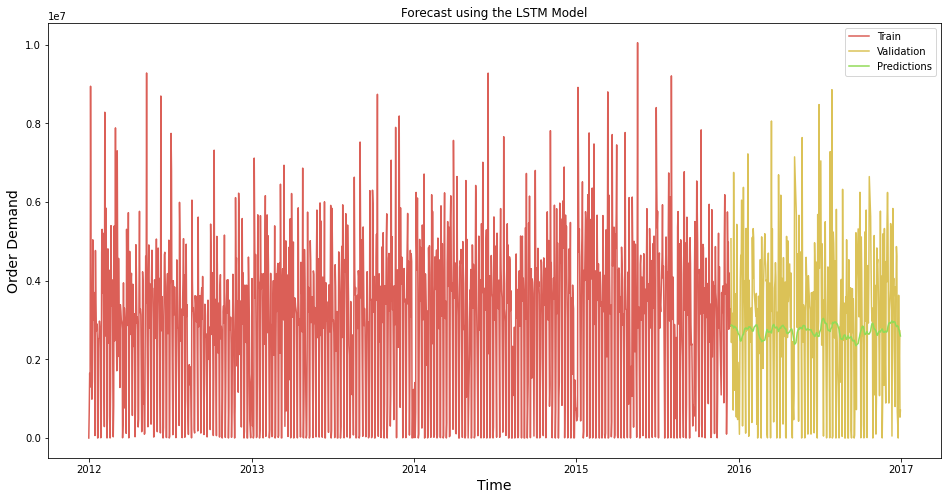

In [86]:
train = df.filter(['Order_Demand'])[: train_close_len]
valid = df.filter(['Order_Demand'])[train_close_len :]
valid["Predictions"] = predictions

plt.figure(figsize = (16, 8))
plt.title('Forecast using the LSTM Model')
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Order Demand', fontsize = 14)
plt.plot(df['Date'][:train_close_len], train["Order_Demand"])
plt.plot(df['Date'][train_close_len :], valid[['Order_Demand', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 1)
plt.show()

### Better LSTM

In [87]:
model = Sequential([
    LSTM(512, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)),
    LSTM(256, activation = 'relu', return_sequences = False),
    Dense(128),
    Dense(64),
    Dense(32),
    Dense(1)
])

In [88]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae'])

In [89]:
model.fit(X_train, y_train, batch_size = 32, epochs = 20, verbose = 1)

Epoch 1/20
41/41 [==============================] - 33s 766ms/step - loss: 0.0465 - mae: 0.1731
Epoch 2/20
41/41 [==============================] - 34s 837ms/step - loss: 0.0407 - mae: 0.1635
Epoch 3/20
41/41 [==============================] - 37s 903ms/step - loss: 0.0405 - mae: 0.1629
Epoch 4/20
41/41 [==============================] - 37s 904ms/step - loss: 0.0405 - mae: 0.1618
Epoch 5/20
41/41 [==============================] - 38s 934ms/step - loss: 0.0407 - mae: 0.1631
Epoch 6/20
41/41 [==============================] - 37s 911ms/step - loss: 0.0406 - mae: 0.1628
Epoch 7/20
41/41 [==============================] - 38s 926ms/step - loss: 0.0403 - mae: 0.1630
Epoch 8/20
41/41 [==============================] - 39s 953ms/step - loss: 0.0396 - mae: 0.1610
Epoch 9/20
41/41 [==============================] - 38s 921ms/step - loss: 0.0390 - mae: 0.1605
Epoch 10/20
41/41 [==============================] - 37s 909ms/step - loss: 0.0381 - mae: 0.1573
Epoch 11/20
41/41 [====================

In [90]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 186ms/step


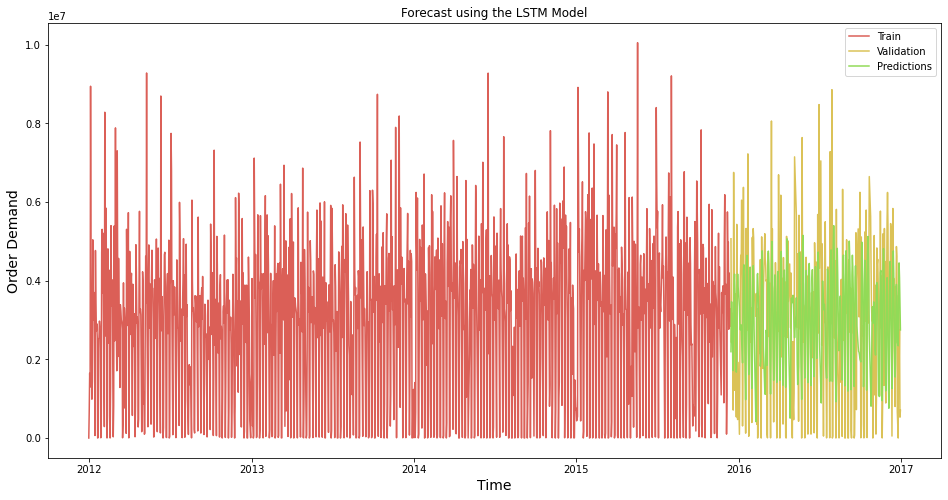

In [91]:
train = df.filter(['Order_Demand'])[: train_close_len]
valid = df.filter(['Order_Demand'])[train_close_len :]
valid["Predictions"] = predictions

plt.figure(figsize = (16, 8))
plt.title('Forecast using the LSTM Model')
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Order Demand', fontsize = 14)
plt.plot(df['Date'][:train_close_len], train["Order_Demand"])
plt.plot(df['Date'][train_close_len :], valid[['Order_Demand', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 1)
plt.show()